<a href="https://www.kaggle.com/sid9300/usecase-cr7-juventus?scriptVersionId=85631363" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;">CR7 - Juventus Stay - 2017/2021</p>
</div>

<div align="center">
<img src="https://www.si.com/.image/c_limit%2Ccs_srgb%2Cq_auto:good%2Cw_700/MTcwMjcyMzI3ODQwMzEwNjA3/cristiano-ronaldo-rape-case-ruling.webp"/>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:125%;
           font-family:Verdana;
           letter-spacing:0.5px">
<p style="padding: 10px;color:white;">
I . This is a **Work in Progress**. You can also contribute on this. 
    </p>
</div>

We will try to find:
1. Who is easiest opponent for CR7 in his period of Juventus irrespective of the tournament?
2. How does he perform in home vs away matches?
3. 
4. Who assists more?
5. Many More...

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:125%;
           font-family:Verdana;
           letter-spacing:0.5px">
<p style="padding: 10px;color:white;">
II. Data Sourcing
</p>
</div>

1. Importing necessary libraries
2. Reading the files
3. Understanding the data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

! pip install pandas

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

cr_file_path = ''

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        cr_file_path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Read the file

! pip install openpyxl 
cr_df_18_19 = pd.read_excel(cr_file_path, sheet_name="Season 18-19")
cr_df_19_20 = pd.read_excel(cr_file_path, sheet_name="Season 19-20")
cr_df_20_21 = pd.read_excel(cr_file_path, sheet_name="Season 20-21")
cr_df = pd.read_excel(cr_file_path, sheet_name="Total")

     |████████████████████████████████| 242 kB 286 kB/s 


In [3]:
cr_df.head()

,Season,Competition,Matchday,Home or Away,For,Against,Time,Type,Position,Scoreline,Assist,Result
0,Season 18/19,Serie A,4,H,Juventus FC,US Sassuolo,50,Tap-in,CF,1-0,NaN,2-1
1,Season 18/19,Serie A,4,H,Juventus FC,US Sassuolo,65,Left-footed shot,CF,2-0,Emre Can,0-2
2,Season 18/19,Serie A,5,A,Juventus FC,Frosinone Calcio,81,Left-footed shot,LW,0-1,NaN,0-2
3,Season 18/19,Serie A,8,A,Juventus FC,Udinese Calcio,37,Left-footed shot,LW,0-2,Mario Mandzukic,0-2
4,Season 18/19,Serie A,9,H,Juventus FC,Genoa CFC,18,Tap-in,LW,1-0,NaN,1-1


In [4]:
# Check the shape

cr_df.shape

(100, 12)

In [5]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Season        100 non-null    object
 1   Competition   100 non-null    object
 2   Matchday      100 non-null    object
 3   Home or Away  100 non-null    object
 4   For           100 non-null    object
 5   Against       100 non-null    object
 6   Time          100 non-null    int64 
 7   Type          100 non-null    object
 8   Position      100 non-null    object
 9   Scoreline     100 non-null    object
 10  Assist        59 non-null     object
 11  Result        100 non-null    object
dtypes: int64(1), object(11)
memory usage: 9.5+ KB


In [6]:
round((cr_df.isnull().sum()*100/len(cr_df)), 2)

Season           0.0
Competition      0.0
Matchday         0.0
Home or Away     0.0
For              0.0
Against          0.0
Time             0.0
Type             0.0
Position         0.0
Scoreline        0.0
Assist          41.0
Result           0.0
dtype: float64

In [7]:
# List columns

cr_df.columns

Index(['Season', 'Competition', 'Matchday', 'Home or Away', 'For', 'Against',
       'Time', 'Type', 'Position', 'Scoreline', 'Assist', 'Result'],
      dtype='object')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:125%;
           font-family:Verdana;
           letter-spacing:0.5px">
<p style="padding: 10px;color:white;">
III. Data Cleaning
</p>
</div>

1. Imputing the missing values
2. Removing unimportant columns

In [8]:
# Creating a deep copy for doing modification
# It also helps in retaining original intact
cr_df_modified = cr_df.copy()
cr_df_modified.head()

,Season,Competition,Matchday,Home or Away,For,Against,Time,Type,Position,Scoreline,Assist,Result
0,Season 18/19,Serie A,4,H,Juventus FC,US Sassuolo,50,Tap-in,CF,1-0,NaN,2-1
1,Season 18/19,Serie A,4,H,Juventus FC,US Sassuolo,65,Left-footed shot,CF,2-0,Emre Can,0-2
2,Season 18/19,Serie A,5,A,Juventus FC,Frosinone Calcio,81,Left-footed shot,LW,0-1,NaN,0-2
3,Season 18/19,Serie A,8,A,Juventus FC,Udinese Calcio,37,Left-footed shot,LW,0-2,Mario Mandzukic,0-2
4,Season 18/19,Serie A,9,H,Juventus FC,Genoa CFC,18,Tap-in,LW,1-0,NaN,1-1


In [9]:
# Creating a 'IsAssisted' column
def is_assisted(x):
    if pd.isna(x):
        return 'No'
    else:
        return 'Yes'

cr_df_modified['IsAssisted'] = cr_df_modified.Assist.apply(lambda x: is_assisted(x))
cr_df_modified.IsAssisted.value_counts()

Yes    59
No     41
Name: IsAssisted, dtype: int64

In [10]:
# Renaming a column 'Home or Away'
cr_df_modified.rename(columns={'Home or Away':'HomeOrAway'}, inplace=True)
cr_df_modified.head(10)

,Season,Competition,Matchday,HomeOrAway,For,Against,Time,Type,Position,Scoreline,Assist,Result,IsAssisted
0,Season 18/19,Serie A,4,H,Juventus FC,US Sassuolo,50,Tap-in,CF,1-0,NaN,2-1,No
1,Season 18/19,Serie A,4,H,Juventus FC,US Sassuolo,65,Left-footed shot,CF,2-0,Emre Can,0-2,Yes
2,Season 18/19,Serie A,5,A,Juventus FC,Frosinone Calcio,81,Left-footed shot,LW,0-1,NaN,0-2,No
3,Season 18/19,Serie A,8,A,Juventus FC,Udinese Calcio,37,Left-footed shot,LW,0-2,Mario Mandzukic,0-2,Yes
4,Season 18/19,Serie A,9,H,Juventus FC,Genoa CFC,18,Tap-in,LW,1-0,NaN,1-1,No
5,Season 18/19,Serie A,10,A,Juventus FC,FC Empoli,54,Penalty,CF,1-1,NaN,1-2,No
6,Season 18/19,Serie A,10,A,Juventus FC,FC Empoli,70,Right-footed shot,CF,1-2,Blaise Matuidi,1-2,Yes
7,Season 18/19,UEFA Champions League,Group Stage,H,Juventus FC,Manchester United,65,Right-footed shot,CF,1-0,Leonardo Bonucci,1-2,Yes
8,Season 18/19,Serie A,12,A,Juventus FC,AC Milan,81,Tap-in,LW,0-2,NaN,0-2,No
9,Season 18/19,Serie A,13,H,Juventus FC,SPAL,29,Left-footed shot,CF,1-0,Miralem Pjanić,2-0,Yes


In [11]:
cr_df_modified.loc[cr_df_modified.Scoreline == 'CF',['Scoreline']] = '3-0'
cr_df_modified['Index'] = cr_df_modified.index + 1

In [12]:
def score_impact(x):
    if x.HomeOrAway == 'H':
        scoreline = x.Scoreline.split('-')
        if int(scoreline[0]) == 1 and int(scoreline[1]) == 0:
            return 'Foundational'
        elif int(scoreline[0]) == int(scoreline[1]):
            return 'Leveled'
        elif int(scoreline[0]) > int(scoreline[1]):
            return 'Consolidated'
        else:
            return 'Catching'
    elif x.HomeOrAway == 'A':
        scoreline = x.Scoreline.split('-')
        if int(scoreline[0]) == 0 and int(scoreline[1]) == 1:
            return 'Foundational'
        elif int(scoreline[0]) == int(scoreline[1]):
            return 'Leveled'
        elif int(scoreline[0]) < int(scoreline[1]):
            return 'Consolidated'
        else:
            return 'Catching'
    return 'DataError'

cr_df_modified['Contribution'] = cr_df_modified.apply(lambda x: score_impact(x), axis=1)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:125%;
           font-family:Verdana;
           letter-spacing:0.5px">
<p style="padding: 10px;color:white;">
IV. Data Analysis
<p>
</div>

In [13]:
# Importing library to ignore noisy warnings
import warnings
warnings.filterwarnings("ignore")

# Importing libraries to plot graphs
import seaborn as sns
import matplotlib.pyplot as plt

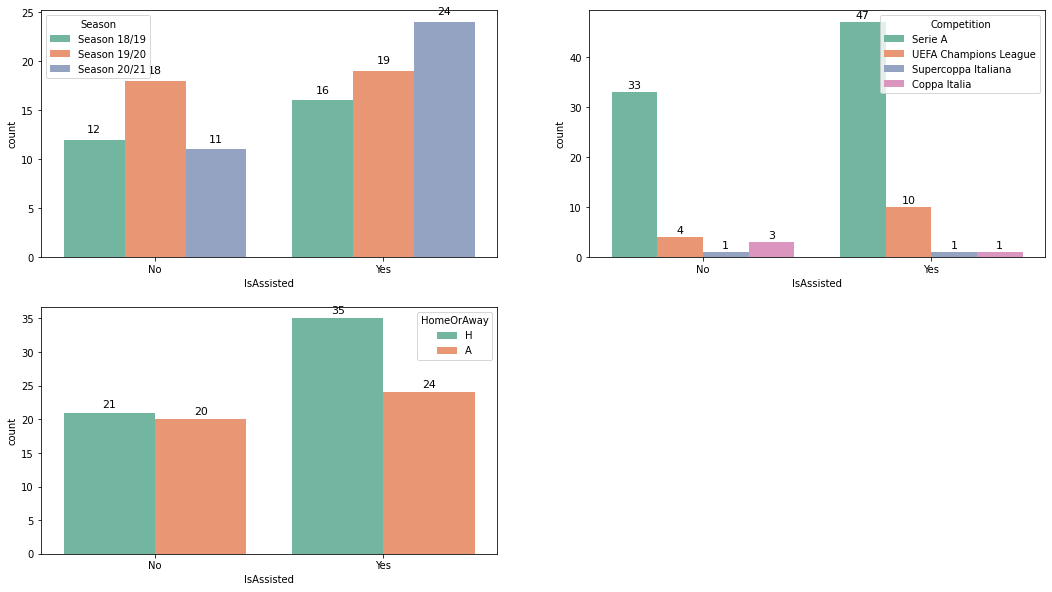

In [14]:
# Visualizing the goals
plt.figure(figsize=(18,10))

plt.subplot(2, 2, 1)
ax = sns.countplot(cr_df_modified.IsAssisted, hue=cr_df_modified.Season, palette = "Set2")

plt.subplot(2, 2, 2)
bx = sns.countplot(cr_df_modified.IsAssisted, hue=cr_df_modified.Competition, palette = "Set2")

plt.subplot(2, 2, 3)
cx = sns.countplot(cr_df_modified.IsAssisted, hue=cr_df_modified.HomeOrAway, palette = "Set2")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
for rect in bx.patches:
    bx.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
for rect in cx.patches:
    cx.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

plt.show()

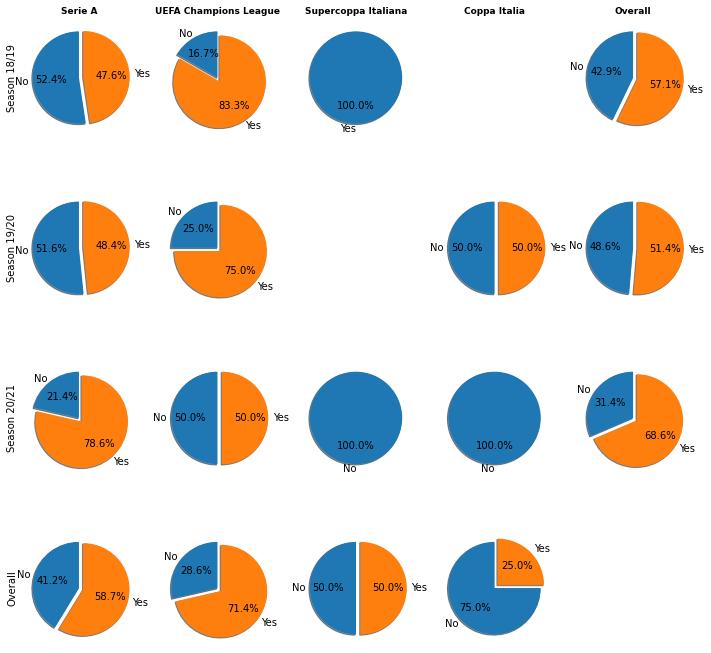

In [15]:
# Trying to plot goal assistance 
plt.figure(figsize=(12,12))

plt.subplot(4,5,1)
data = cr_df_modified[(cr_df_modified.Competition == 'Serie A')&(cr_df_modified.Season == 'Season 18/19')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90, explode=(0, 0.1))
plt.ylabel('Season 18/19')
plt.title('Serie A',fontweight="bold",fontsize = 9)

plt.subplot(4,5,2)
data = cr_df_modified[(cr_df_modified.Competition == 'UEFA Champions League')&(cr_df_modified.Season == 'Season 18/19')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90, explode=(0, 0.1))
plt.ylabel('')
plt.title('UEFA Champions League',fontweight="bold",fontsize = 9)

plt.subplot(4,5,3)
data = cr_df_modified[(cr_df_modified.Competition == 'Supercoppa Italiana')&(cr_df_modified.Season == 'Season 18/19')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')
plt.title('Supercoppa Italiana',fontweight="bold",fontsize = 9)

plt.subplot(4,5,4)
data = cr_df_modified[(cr_df_modified.Competition == 'Coppa Italia')&(cr_df_modified.Season == 'Season 18/19')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')
plt.title('Coppa Italia',fontweight="bold",fontsize = 9)

plt.subplot(4,5,5)
data = cr_df_modified[(cr_df_modified.Season == 'Season 18/19')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90, explode=(0, 0.1))
plt.ylabel('')
plt.title('Overall',fontweight="bold",fontsize = 9)

#1 #############################################################

plt.subplot(4,5,6)
data = cr_df_modified[(cr_df_modified.Competition == 'Serie A')&(cr_df_modified.Season == 'Season 19/20')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90, explode=(0, 0.1))
plt.ylabel('Season 19/20')

plt.subplot(4,5,7)
data = cr_df_modified[(cr_df_modified.Competition == 'UEFA Champions League')&(cr_df_modified.Season == 'Season 19/20')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90, explode=(0, 0.1))
plt.ylabel('')

plt.subplot(4,5,8)
data = cr_df_modified[(cr_df_modified.Competition == 'Supercoppa Italiana')&(cr_df_modified.Season == 'Season 19/20')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')

plt.subplot(4,5,9)
data = cr_df_modified[(cr_df_modified.Competition == 'Coppa Italia')&(cr_df_modified.Season == 'Season 19/20')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90, explode=(0, 0.1))
plt.ylabel('')

plt.subplot(4,5,10)
data = cr_df_modified[(cr_df_modified.Season == 'Season 19/20')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90, explode=(0, 0.1))
plt.ylabel('')

#2 #############################################################

plt.subplot(4,5,11)
data = cr_df_modified[(cr_df_modified.Competition == 'Serie A')&(cr_df_modified.Season == 'Season 20/21')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90, explode=(0, 0.1))
plt.ylabel('Season 20/21')

plt.subplot(4,5,12)
data = cr_df_modified[(cr_df_modified.Competition == 'UEFA Champions League')&(cr_df_modified.Season == 'Season 20/21')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90, explode=(0, 0.1))
plt.ylabel('')

plt.subplot(4,5,13)
data = cr_df_modified[(cr_df_modified.Competition == 'Supercoppa Italiana')&(cr_df_modified.Season == 'Season 20/21')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')

plt.subplot(4,5,14)
data = cr_df_modified[(cr_df_modified.Competition == 'Coppa Italia')&(cr_df_modified.Season == 'Season 20/21')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')

plt.subplot(4,5,15)
data = cr_df_modified[(cr_df_modified.Season == 'Season 20/21')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90, explode=(0, 0.1))
plt.ylabel('')


#3 #############################################################

plt.subplot(4,5,16)
data = cr_df_modified[(cr_df_modified.Competition == 'Serie A')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90, explode=(0, 0.1))
plt.ylabel('Overall')

plt.subplot(4,5,17)
data = cr_df_modified[(cr_df_modified.Competition == 'UEFA Champions League')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90, explode=(0, 0.1))
plt.ylabel('')

plt.subplot(4,5,18)
data = cr_df_modified[(cr_df_modified.Competition == 'Supercoppa Italiana')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90, explode=(0, 0.1))
plt.ylabel('')

plt.subplot(4,5,19)
data = cr_df_modified[(cr_df_modified.Competition == 'Coppa Italia')]
data.groupby(['IsAssisted'])['IsAssisted'].count().plot(kind='pie', autopct='%1.1f%%', shadow = True, startangle=90, explode=(0, 0.1))
plt.ylabel('')

plt.show()

#### He scores most of the goals from someone's assistance in 'Serie A' while it is reverse in 'Copa Italia'.

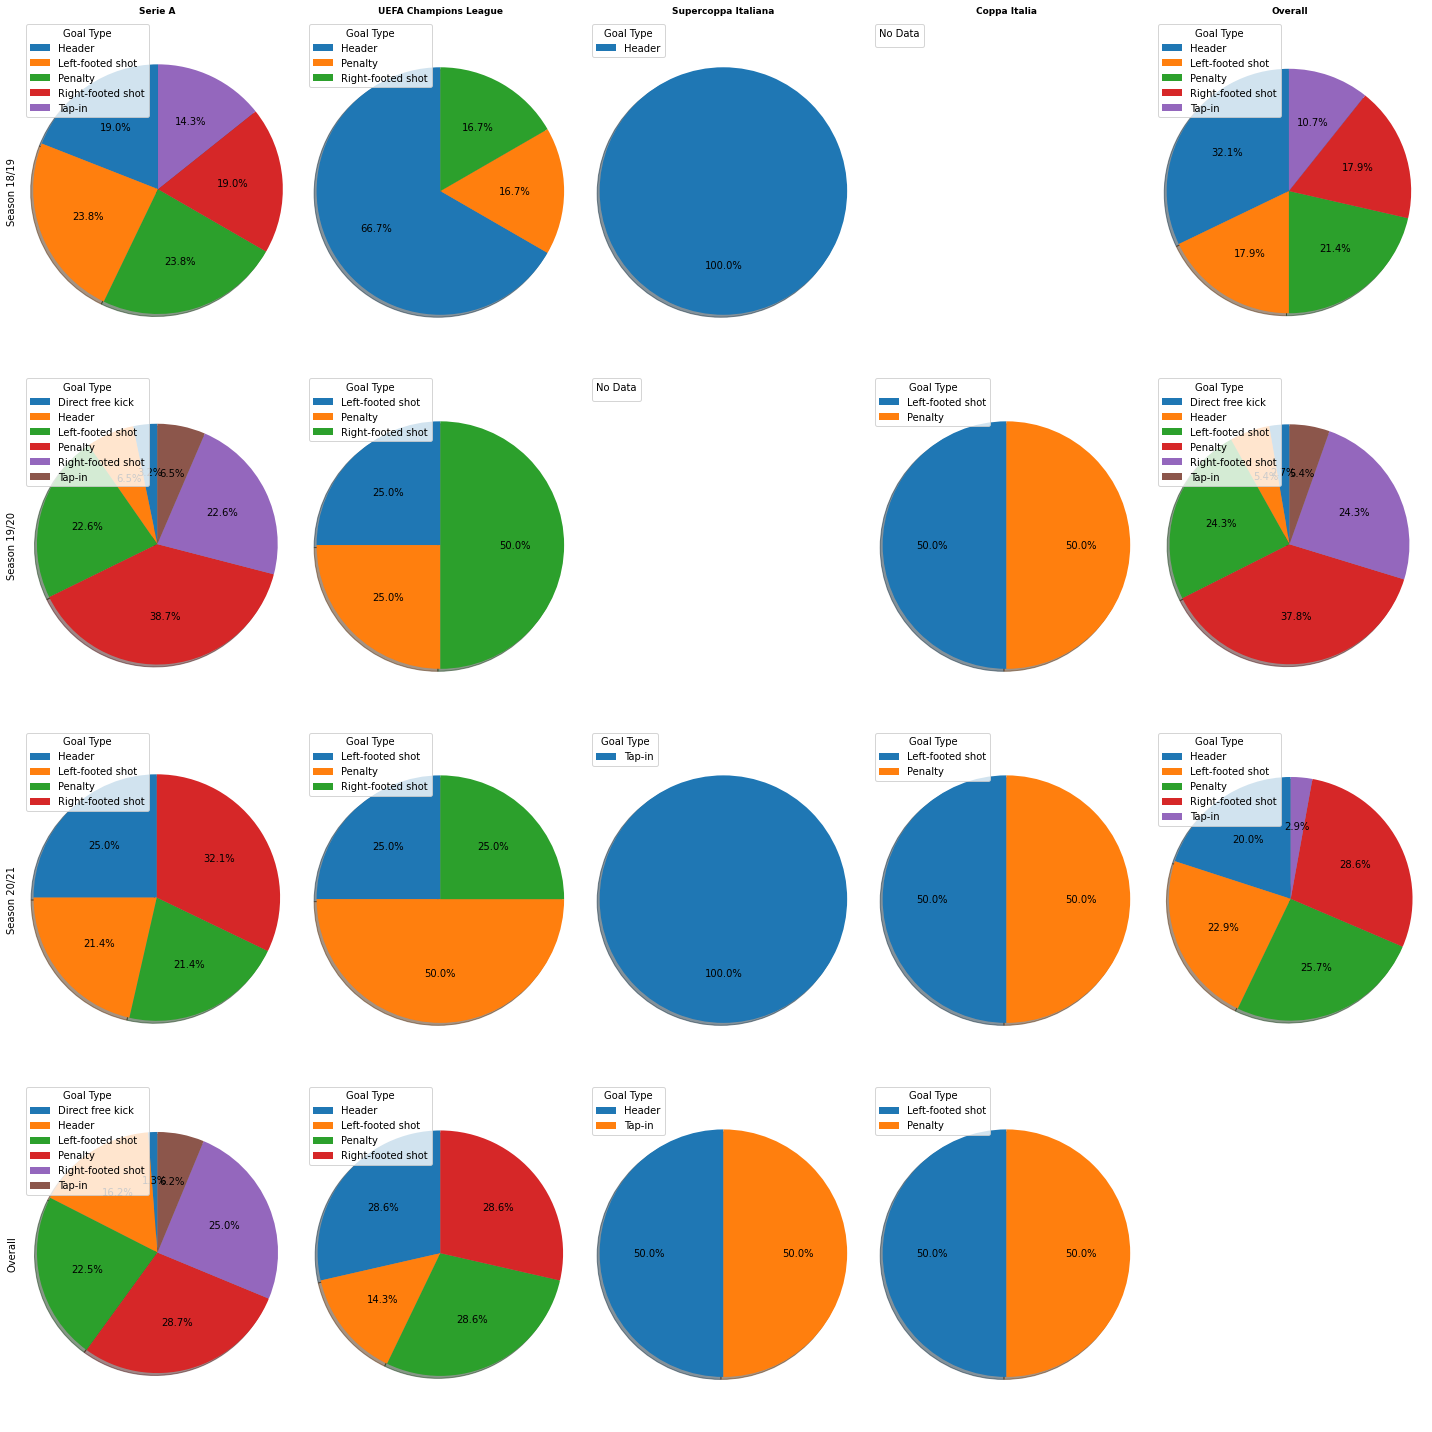

In [16]:
# Trying to plot goal types
plt.figure(figsize=(20,20))

plt.subplot(4,5,1)
data = cr_df_modified[(cr_df_modified.Competition == 'Serie A')&(cr_df_modified.Season == 'Season 18/19')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('Season 18/19')
plt.title('Serie A',fontweight="bold",fontsize = 9)
plt.legend(title="Goal Type", labels = data.Type, loc="upper left")
plt.axis('equal')
plt.tight_layout()

plt.subplot(4,5,2)
data = cr_df_modified[(cr_df_modified.Competition == 'UEFA Champions League')&(cr_df_modified.Season == 'Season 18/19')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')
plt.title('UEFA Champions League',fontweight="bold",fontsize = 9)
plt.legend(title="Goal Type", labels = data.Type, loc="upper left")
plt.axis('equal')
plt.tight_layout()

plt.subplot(4,5,3)
data = cr_df_modified[(cr_df_modified.Competition == 'Supercoppa Italiana')&(cr_df_modified.Season == 'Season 18/19')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')
plt.title('Supercoppa Italiana',fontweight="bold",fontsize = 9)
plt.legend(title="Goal Type", labels = data.Type, loc='upper left')
plt.axis('equal')
plt.tight_layout()

plt.subplot(4,5,4)
data = cr_df_modified[(cr_df_modified.Competition == 'Coppa Italia')&(cr_df_modified.Season == 'Season 18/19')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')
plt.title('Coppa Italia',fontweight="bold",fontsize = 9)
plt.legend(title="No Data", labels = data.Type, loc='upper left')
plt.axis('equal')
plt.tight_layout()

plt.subplot(4,5,5)
data = cr_df_modified[(cr_df_modified.Season == 'Season 18/19')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')
plt.title('Overall',fontweight="bold",fontsize = 9)
plt.legend(title="Goal Type", labels = data.Type, loc='upper left')
plt.axis('equal')
plt.tight_layout()

#1 #############################################################

plt.subplot(4,5,6)
data = cr_df_modified[(cr_df_modified.Competition == 'Serie A')&(cr_df_modified.Season == 'Season 19/20')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('Season 19/20')
plt.legend(title="Goal Type", labels = data.Type, loc="upper left")
plt.axis('equal')
plt.tight_layout()

plt.subplot(4,5,7)
data = cr_df_modified[(cr_df_modified.Competition == 'UEFA Champions League')&(cr_df_modified.Season == 'Season 19/20')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')
plt.legend(title="Goal Type", labels = data.Type, loc="upper left")
plt.axis('equal')
plt.tight_layout()

plt.subplot(4,5,8)
data = cr_df_modified[(cr_df_modified.Competition == 'Supercoppa Italiana')&(cr_df_modified.Season == 'Season 19/20')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')
plt.legend(title="No Data", labels = data.Type, loc="upper left")
plt.axis('equal')
plt.tight_layout()

plt.subplot(4,5,9)
data = cr_df_modified[(cr_df_modified.Competition == 'Coppa Italia')&(cr_df_modified.Season == 'Season 19/20')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')
plt.legend(title="Goal Type", labels = data.Type, loc="upper left")
plt.axis('equal')
plt.tight_layout()

plt.subplot(4,5,10)
data = cr_df_modified[(cr_df_modified.Season == 'Season 19/20')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')
plt.legend(title="Goal Type", labels = data.Type, loc="upper left")
plt.axis('equal')
plt.tight_layout()

#2 #############################################################

plt.subplot(4,5,11)
data = cr_df_modified[(cr_df_modified.Competition == 'Serie A')&(cr_df_modified.Season == 'Season 20/21')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('Season 20/21')
plt.legend(title="Goal Type", labels = data.Type, loc="upper left")
plt.axis('equal')
plt.tight_layout()

plt.subplot(4,5,12)
data = cr_df_modified[(cr_df_modified.Competition == 'UEFA Champions League')&(cr_df_modified.Season == 'Season 20/21')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')
plt.legend(title="Goal Type", labels = data.Type, loc="upper left")
plt.axis('equal')
plt.tight_layout()

plt.subplot(4,5,13)
data = cr_df_modified[(cr_df_modified.Competition == 'Supercoppa Italiana')&(cr_df_modified.Season == 'Season 20/21')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')
plt.legend(title="Goal Type", labels = data.Type, loc="upper left")
plt.axis('equal')
plt.tight_layout()

plt.subplot(4,5,14)
data = cr_df_modified[(cr_df_modified.Competition == 'Coppa Italia')&(cr_df_modified.Season == 'Season 20/21')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')
plt.legend(title="Goal Type", labels = data.Type, loc="upper left")
plt.axis('equal')
plt.tight_layout()

plt.subplot(4,5,15)
data = cr_df_modified[(cr_df_modified.Season == 'Season 20/21')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')
plt.legend(title="Goal Type", labels = data.Type, loc="upper left")
plt.axis('equal')
plt.tight_layout()


#3 #############################################################

plt.subplot(4,5,16)
data = cr_df_modified[(cr_df_modified.Competition == 'Serie A')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('Overall')
plt.legend(title="Goal Type", labels = data.Type, loc="upper left")
plt.axis('equal')
plt.tight_layout()

plt.subplot(4,5,17)
data = cr_df_modified[(cr_df_modified.Competition == 'UEFA Champions League')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')
plt.legend(title="Goal Type", labels = data.Type, loc="upper left")
plt.axis('equal')
plt.tight_layout()

plt.subplot(4,5,18)
data = cr_df_modified[(cr_df_modified.Competition == 'Supercoppa Italiana')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')
plt.legend(title="Goal Type", labels = data.Type, loc="upper left")
plt.axis('equal')
plt.tight_layout()

plt.subplot(4,5,19)
data = cr_df_modified[(cr_df_modified.Competition == 'Coppa Italia')]
data = data.groupby(['Type'])['Type'].count().reset_index(name='Count')
plt.pie(data.Count, autopct='%1.1f%%', shadow = True, startangle=90)
plt.ylabel('')
plt.legend(title="Goal Type", labels = data.Type, loc="upper left")
plt.axis('equal')
plt.tight_layout()

plt.show()

#### A lot of intriguing observations. 
-  If we see overall scoring pattern for Serie A, the number of goals scored using left foot vs right foot is almost same. That's why he is called a player equally talented to play from both feet.
- As we check the same values in 'UEFA Champions League', he prefers the right foot twice than the left foot to score.
- He always score majority of the goals from the penalty shoot.
- In the season 18/19, he scored most of the goals through header.
- In the season 19/20, he scored most of the goals through penalty.

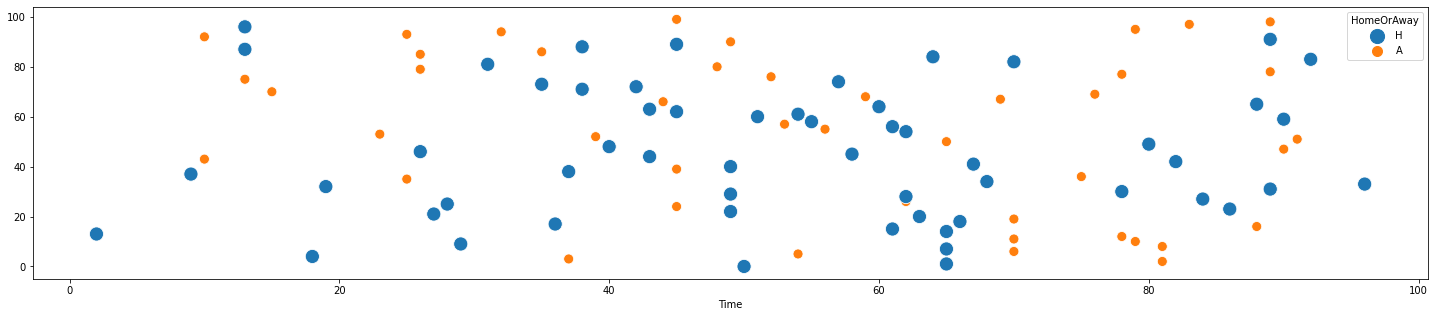

In [17]:
plt.figure(figsize=(25,5))

data = cr_df_modified.reset_index()
sns.scatterplot(x=data.Time, y=data.index, hue=data.HomeOrAway , data=data, marker='o', size=data.HomeOrAway, sizes=(100,200))

plt.show()

#### For 'Away' games, before 50 games, most of the scores were in the second half while after 50 games, it could diversify.
#### For 'Home' games, most of the goals are scored after 30 mins as the game intensifies.

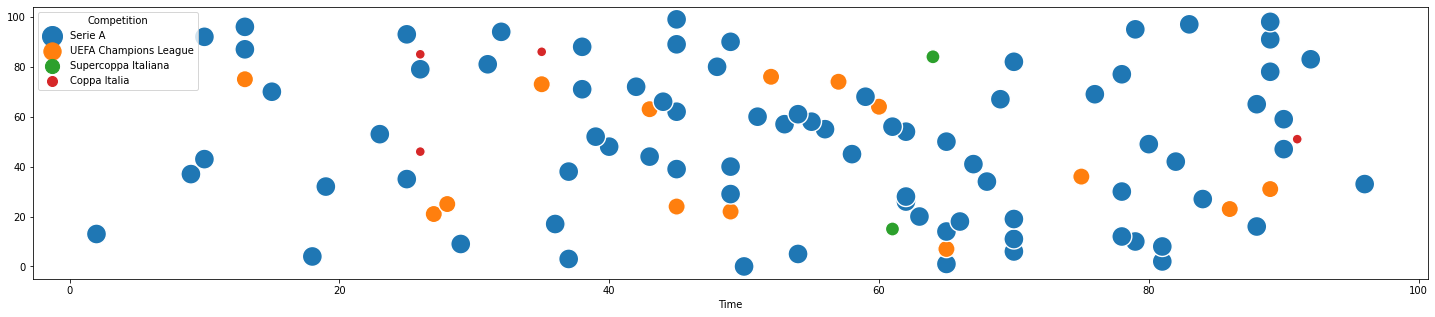

In [18]:
plt.figure(figsize=(25,5))

data = cr_df_modified.reset_index()
sns.scatterplot(x=data.Time, y=data.index, hue=data.Competition , data=data, marker='o', size=data.Competition, sizes=(100,400))

plt.show()

#### Since, CR7 has got maximum matches in Serie A so that pattern of goal scoring is smooth across the time.

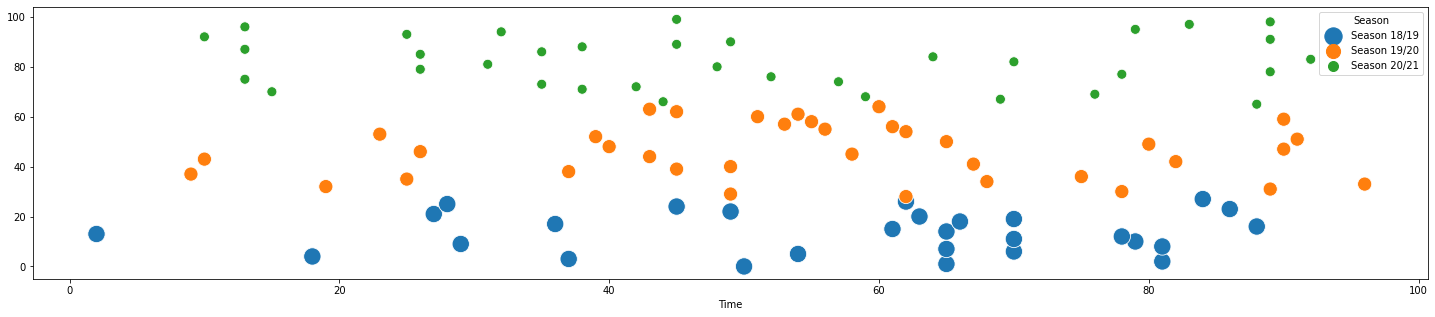

In [19]:
plt.figure(figsize=(25,5))

data = cr_df_modified.reset_index()
sns.scatterplot(x=data.Time, y=data.index, hue=data.Season , data=data, marker='o', size=data.Season, sizes=(100,300))

plt.show()

#### We can clearly see season-on-season, CR7 has improved a little on his goal scoring pattern which was very much accumulated towards the mid of the second half of the game in the initial season. 

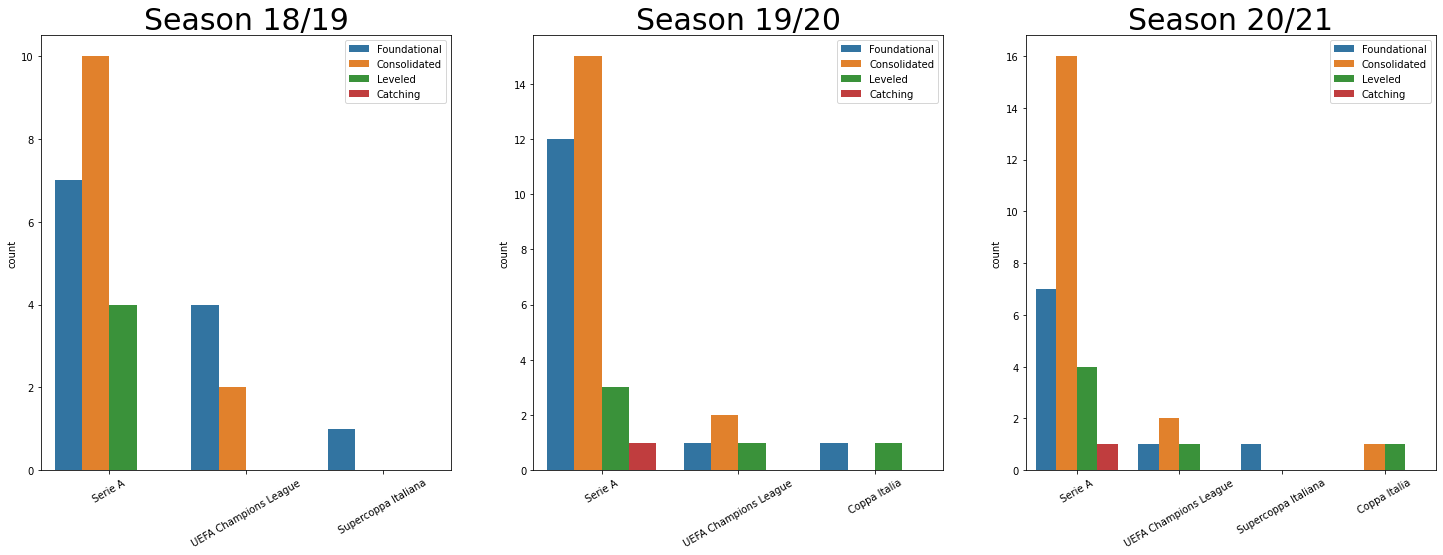

In [20]:
# Trying to figure out how CR7 contributing to win
plt.figure(figsize=(25, 8))

plt.subplot(1,3,1)
data = cr_df_modified[cr_df_modified.Season == 'Season 18/19']
sns.countplot(data.Competition, hue=cr_df_modified.Contribution)
plt.xticks(rotation=30)
plt.xlabel('')
plt.title('Season 18/19', fontsize=30)
plt.legend(loc="upper right")

plt.subplot(1,3,2)
data = cr_df_modified[cr_df_modified.Season == 'Season 19/20']
sns.countplot(data.Competition, hue=cr_df_modified.Contribution)
plt.xticks(rotation=30)
plt.xlabel('')
plt.title('Season 19/20', fontsize=30)
plt.legend(loc="upper right")

plt.subplot(1,3,3)
data = cr_df_modified[cr_df_modified.Season == 'Season 20/21']
sns.countplot(data.Competition, hue=cr_df_modified.Contribution)
plt.xticks(rotation=30)
plt.xlabel('')
plt.title('Season 20/21', fontsize=30)
plt.legend(loc="upper right")


plt.show()

#### Various inferences can be seen 
* If we compare the three seasons of Serie A, we would end of finding that CR7 has started contributing to score goals when the team is chasing the scoreline.
* The above holds true for Champions League too.
* In Season 19/20, he could help in opening the scoreline for the team. 
* He can be found the best in consolidating the scoreline (early lead) for the team.

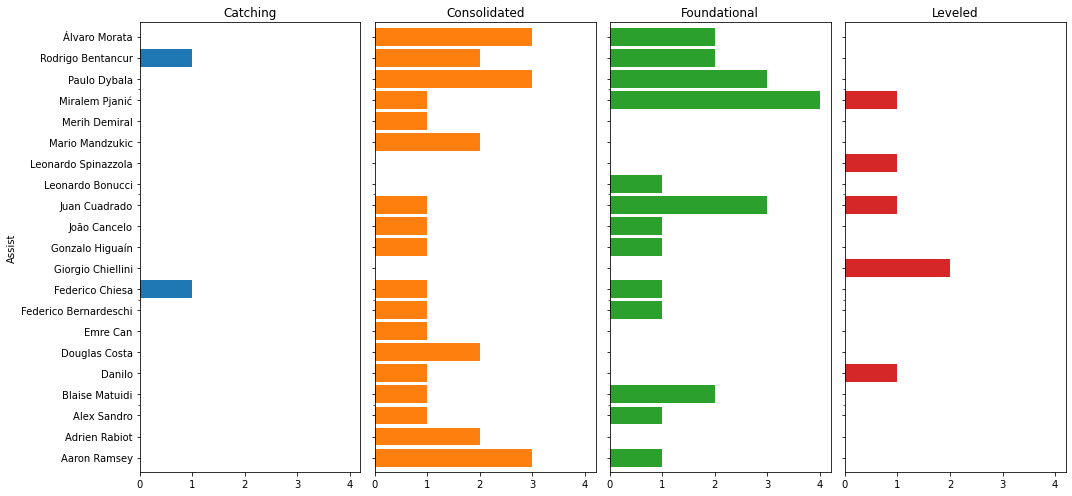

In [21]:
# Trying to plot how assistance helped
cr_df_assist = cr_df_modified.groupby(['Assist', 'Contribution'])['Contribution'].count().unstack()
cr_df_assist.plot.barh(figsize=(15, 7),  width=0.85,  subplots=True, legend=False, 
                             layout=(1, 4), sharey=True)
plt.tight_layout()
plt.show()

### Various inferences can also be seen from this graph
* Morata, Dybala and Ramsey provides maximum assistance in consolidating the score.
* Chiesa and Bentacur helps in catching the scoreline but that's just once.
* Pjanic assists in opening the scoreline.
* Chiellini helps in leveling the scoreline mostly.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:125%;
           font-family:Verdana;
           letter-spacing:0.5px">
<p style="padding: 10px;color:white;">
V. Experiment Code
<p>
</div>

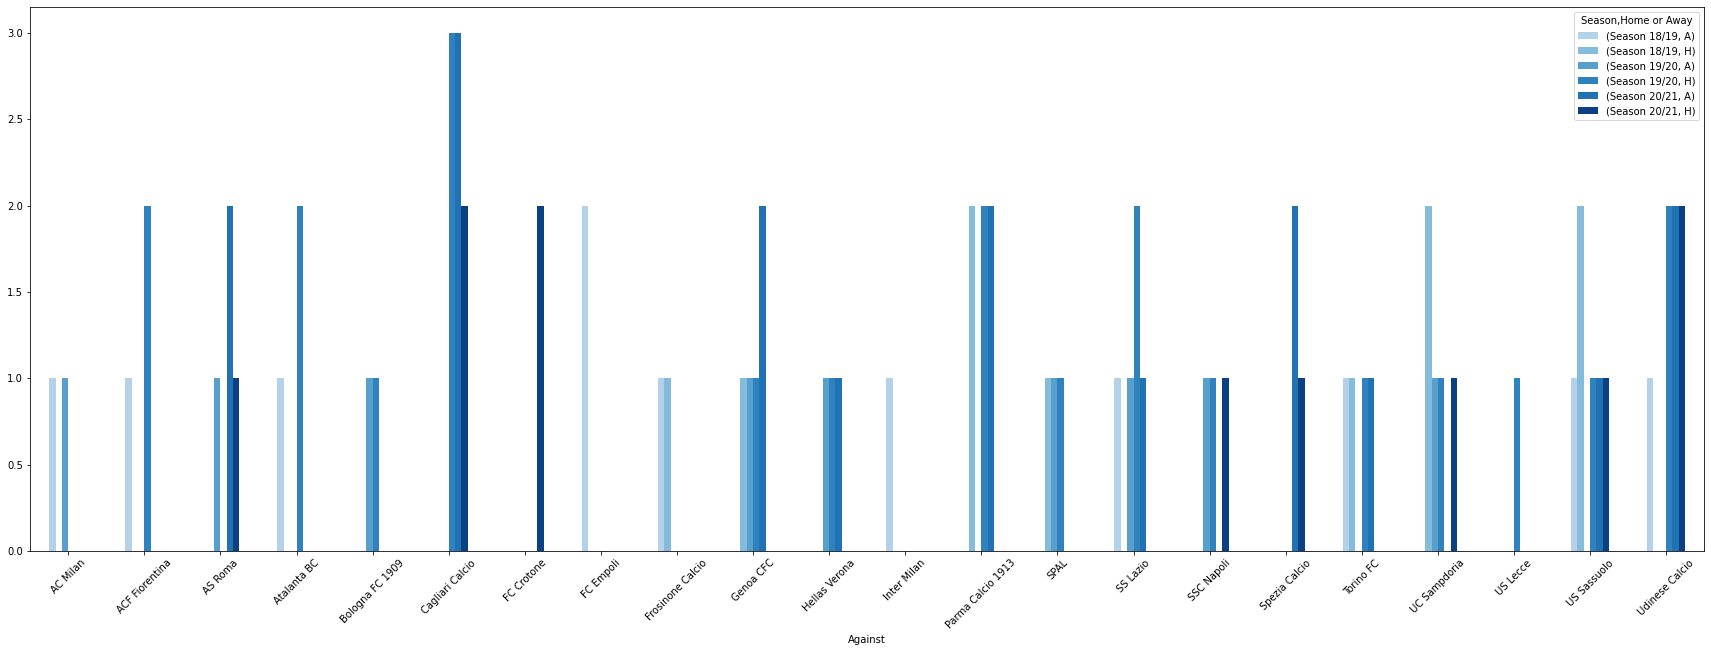

In [22]:
fig, ax = plt.subplots(figsize=(30,10))

hex_list = ["#b3d2e9", "#85bcdb", "#57a0ce", "#3082be", "#2171b5", "#0b4083"]
performance = cr_df[cr_df.Competition == 'Serie A'].groupby([cr_df.Against, cr_df['Home or Away'], cr_df.Season]).size().unstack(level=2).unstack(level=1).plot(kind='bar', ax=ax, color=hex_list)
plt.xticks(rotation=45)
plt.show()